In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import speed_of_light as c
from scipy.constants import epsilon_0 
from scipy.constants import mu_0

from matplotlib.animation import FuncAnimation

In [5]:
def Gaussian_source(t, t_0, tau, A): 
    y = A*np.exp(-((t-t_0)/tau)**2)
    return y

In [6]:
jmax = 500
N_time_steps = 1000

f_max = 10e14
tau = 1/(np.pi*f_max)
t_0 = 5*tau
z_source = int(jmax/2)

smallest_feature_dimension = 1e-2
eps_yy = np.ones(jmax)
mu_xx = np.ones(jmax)

n = np.sqrt(mu_xx*eps_yy)

N_lam = 20
N_dim = 4
lambda_min = c/(f_max*np.max(n))
z_step = np.min([lambda_min/N_lam, smallest_feature_dimension/N_dim])
z_step = lambda_min/N_lam
z_axis = np.arange(0, z_step*jmax, z_step)

#time_step = np.min([n[0]*z_step/(2*c), tau/20])
time_step = n[0]*z_step/(2*c)

mEy = c*time_step/(eps_yy*z_step)
mHx = c*time_step/(mu_xx*z_step)

Ey = np.zeros(jmax)
Hx = np.zeros(jmax)

time_array = np.array(np.arange(0, time_step*N_time_steps, time_step))
A = 1
g = Gaussian_source(time_array, t_0, tau, A)


In [ ]:
# single plots 

for i in range(N_time_steps):

    Hx[0:jmax-1] = Hx[0:jmax-1] + mHx[0:jmax-1]*(Ey[1:jmax] - Ey[0:jmax-1])
    Hx[jmax-1] = Hx[jmax-1] + mHx[jmax-1]*(0 - Ey[jmax-1])

    Ey[0] = Ey[0] + mEy[0]*(Hx[0] - 0)
    Ey[1:jmax] = Ey[1:jmax] + mEy[1:jmax]*(Hx[1:jmax] - Hx[0:jmax-1])

    Ey[z_source] = Ey[z_source] + g[i]

    if i % 100 == 0:  
        plt.plot(z_axis, Ey)
        plt.ylim([-1.2, 1.2])
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


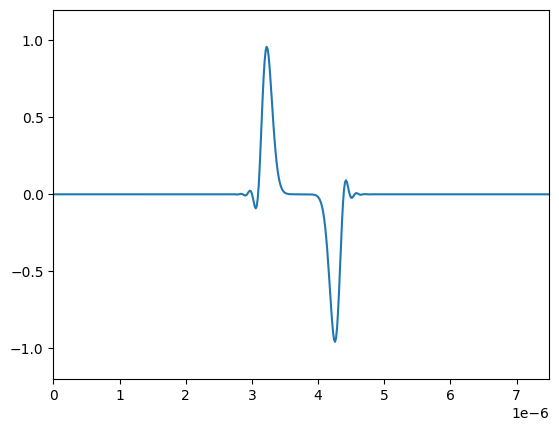

In [7]:
# animation

fig, ax = plt.subplots()
line, = ax.plot(z_axis, Ey)
ax.set_ylim([-1.2, 1.2])
ax.set_xlim([0, z_step * jmax])

def update(frame):
    global Ey, Hx
    # Update Hx
    Hx[0:jmax-1] += mHx[0:jmax-1] * (Ey[1:jmax] - Ey[0:jmax-1])
    Hx[jmax-1] += mHx[jmax-1] * (0 - Ey[jmax-1])  # Boundary condition

    # Update Ey
    Ey[1:jmax] += mEy[1:jmax] * (Hx[1:jmax] - Hx[0:jmax-1])
    Ey[0] += mEy[0] * (Hx[0] - 0)  # Boundary condition

    # Add the source
    Ey[z_source] += g[frame]  # Adjust source index accordingly

    # Update the plot data
    line.set_ydata(Ey)
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=range(N_time_steps), blit=True)

# To save the animation, uncomment the following line
ani.save('fdtd_animation.gif', dpi=120, writer="imagemagick")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import speed_of_light as c
from scipy.constants import epsilon_0 
from scipy.constants import mu_0

jmax = 500
jsource = 250
nmax = 500

Ex = np.zeros(jmax)
Hz = np.zeros(jmax)
Ex_prev = np.zeros(jmax)
Hz_prev = np.zeros(jmax)

lambda_min = 350e-9
dx = lambda_min/20
dt = dx/c

eps = epsilon_0

def Source_Function(t): 
    lambda_0 = 550e-9
    w0 = 2*np.pi*c/lambda_0
    tau = 30
    t_0 = 3*tau 
    return np.exp(-((t-t_0)/tau)**2)*np.sin(w0*t*dt)

mEy = dt/(dx*eps)
mHx = dt/(dx*mu_0)

for n in range(nmax):
    for j in range(jmax-1):
        Hz[j] = Hz_prev[j] + mHx*(Ex[j+1] - Ex[j])
        Hz_prev[j] = Hz[j]

    for j in range(1, jmax):
        Ex[j] = Ex_prev[j] + mEy*(Hz[j] - Hz[j-1])
        Ex_prev[j] = Ex[j]
    
    Ex[jsource] = Ex[jsource] + Source_Function(n+1)
    Ex_prev[jsource] = Ex[jsource]

    if n%40 == 0:  
        plt.plot(Ex)
        plt.ylim([-1,1])
        plt.show()
        plt.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import speed_of_light as c
from scipy.constants import epsilon_0 
from scipy.constants import mu_0

jmax = 500
jsource = 250
nmax = 500

Ex = np.zeros(jmax)
Hz = np.zeros(jmax)
Ex_prev = np.zeros(jmax)
Hz_prev = np.zeros(jmax)

lambda_min = 350e-9
dx = lambda_min/20
dt = dx/c

eps = epsilon_0

def Source_Function(t): 
    tau = 30
    t_0 = 3*tau 
    return np.exp(-((t-t_0)/tau)**2)

mEy = dt/(dx*eps)
mHx = dt/(dx*mu_0)

for n in range(nmax):
    Hz[0:jmax - 1] = Hz[0:jmax - 1] + mHx*(Ex[1:jmax] - Ex[0:jmax - 1])
    Hz[jmax - 1] = Hz[jmax - 1] + mHx* (0 - Ex[jmax - 1])

    Ex[0] = Ex[0] + mEy* (Hz[0] - 0)
    Ex[1:jmax] = Ex[1:jmax] + mEy* (Hz[1:jmax] - Hz[0:jmax - 1])
    
    Ex[jsource] = Ex[jsource] + Source_Function(n)

    if n%40 == 0:  
        plt.plot(Ex)
        plt.ylim([-1,1])
        plt.show()
        plt.close()